# Agenda

- Random Variables Definition
    
- Discrete Random Variables

- Probability Mass Functions and Cumulative Mass Functions for Discrete Random Variables

- Continuous Random Variables

- Probability Density Functions and Cumulative Density Functions for Continuous Random Variables.


## Random Variables

Informally: "A variable whouse values depend on outcomes of a random phenomenon"

More informally: :) "A map from a random process's outcomes to numbers""

What about formally? Let's see!

[Note you really don't want to do this but it's your choice: Read definition part from Wikipedia](https://en.wikipedia.org/wiki/Random_variable)

### Examples

Let's start with a traditional one:

__Example:__
Experiment: rolling two dice: 

X -- (This is usually how we denote a random variable.) {Sum of numbers on the dice}

Q: what are the possible values of X:

__Example:__ 

Experiment: Tossing a coin 

X = 15 if it is Head and X =-10 if it is Tail.


__Example:__ 

Experiment: Choosing a random person from Lafayatte Square

Y: This person's exact height in meters. 

Q: What are the possible values that Y can take?

__Example:__ 

Experiment: Pick a random point from the unit square.

Z: The x-coordinate of the point

Q: What is the possible values that Z-can take?




Now let's discuss the random variables in more concrete setting.

In [1]:
import itertools
import numpy as np

## let's create a deck of cards
suits = ['diamonds', 'clubs', 'hearts', 'spades']

runs = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

cards = list(itertools.product(suits, runs))

## Find all possible 2 cards 
## Combinations


sample_space = list(itertools.combinations(cards,2))

In [2]:
sample_space[:5]

[(('diamonds', 'A'), ('diamonds', '2')),
 (('diamonds', 'A'), ('diamonds', '3')),
 (('diamonds', 'A'), ('diamonds', '4')),
 (('diamonds', 'A'), ('diamonds', '5')),
 (('diamonds', 'A'), ('diamonds', '6'))]

In [5]:
np.random.shuffle(sample_space)

In [6]:
sample_space

[(('hearts', '4'), ('spades', '5')),
 (('clubs', '10'), ('spades', '5')),
 (('hearts', 'A'), ('spades', 'J')),
 (('diamonds', 'K'), ('spades', '6')),
 (('diamonds', '7'), ('clubs', 'J')),
 (('clubs', '9'), ('spades', 'K')),
 (('hearts', '5'), ('spades', '2')),
 (('spades', '6'), ('spades', 'J')),
 (('diamonds', '10'), ('hearts', 'A')),
 (('diamonds', 'A'), ('hearts', '10')),
 (('diamonds', 'K'), ('clubs', '9')),
 (('clubs', 'K'), ('hearts', 'J')),
 (('diamonds', '4'), ('clubs', 'J')),
 (('diamonds', 'J'), ('spades', '7')),
 (('diamonds', '3'), ('diamonds', '10')),
 (('clubs', 'Q'), ('spades', '10')),
 (('clubs', 'A'), ('spades', 'A')),
 (('clubs', '6'), ('spades', '2')),
 (('diamonds', 'J'), ('diamonds', 'K')),
 (('hearts', '7'), ('spades', '4')),
 (('diamonds', 'A'), ('hearts', '4')),
 (('diamonds', '8'), ('clubs', '2')),
 (('hearts', '9'), ('spades', '8')),
 (('clubs', '8'), ('hearts', '5')),
 (('clubs', 'J'), ('spades', '7')),
 (('diamonds', '5'), ('diamonds', '9')),
 (('clubs', '8'

In [3]:
## what is the lenght of sample space?

Let's us define a function $X: S \to \mathbb{N}$ on this sample space such that when X(card1, card2) = card1 + card2. 

(J = 11, Q = 12, K=13, A = 1)

Let's write this function in code:

In [20]:
royal_num = {'A':1, 'J':11, 'Q':12, 'K':13}

def random_variable(two_cards):
    """
    two_cards: tuple, expected format is: (('spades', '3'), ('spades', '10'))
    
    return:
    
    s: integer. Sum of the values of two cards. for example (('spades', '3'), ('spades', '10')) --> 13
    """
    
    num1 = 0
    num2 = 0
    
    if two_cards[0][1] in royal_num.keys():
        num1 = royal_num[two_cards[0][1]]
    else:
        num1 = int(two_cards[0][1])
    if two_cards[1][1] in royal_num.keys():
        num2 = royal_num[two_cards[1][1]]
    else:
        num2 = int(two_cards[1][1])
    
    return num1 +num2
    

In [15]:
card_index = np.random.choice(range(1300),1)[0]
print(sample_space[card_index])
rand_variable(sample_space[card_index])

(('clubs', '6'), ('spades', '3'))


9

In [ ]:
# %load -r 1-18 supplement.py
royal_num = {'A':1, 'J':10, 'Q':10, 'K':10}
def random_variable(two_cards):
    num1 = 0
    num2 = 0
    card1 = two_cards[0]
    card2 = two_cards[1]
    if card1[1] in royal_num.keys():
        num1 = royal_num[card1[1]]
    else:
        num1 = int(card1[1])
    if card2[1] in royal_num.keys():
        num2 = royal_num[card2[1]]
    else:
        num2 = int(card2[1])
    return num1 + num2


In [17]:
## Find this number by using combinations
len(sample_space)

1326

### Discrete and Continuous Random Variables

- Note that in the examples above we can count possible values for some random variables. These random variables are called __discrete random variables__.

- In other cases, it is not possible to be able to count exact possible values of a random variables. These are called __continuous random variables__. We can also say that continuous random variables can take any value in a range.


Q: Let's go back and decide which random variables are continuous and which ones are discrete.

## Distributions

Why do we study random variables?

- Random variables most of the time more relevant to the problem we would like to solve. 

Q: What is the probability distribution of a random variable?

A: It is a function from a random variables possible values to numbers again. 

- Exact definition of a distribution changes slightly depending on whether we are working with a discrete random variable or a continuous one. 



### Probability Mass Function

[For formal discussion](https://www.itl.nist.gov/div898/handbook/eda/section3/eda361.htm)

The probability mass function is the function which describes the probability associated with the random variable x. This function is named p(x) or P(X=x) to avoid confusion. P(X=x) corresponds to the probability that the random variable x take the value X 


P(X = x): the probability of the event that the random variable X takes exactly the value x.

P(X = 1) = 0

In [21]:
# %load -r 21 supplement.py
all_values = [random_variable(two_cards) for two_cards in sample_space]

In [23]:
all_values;

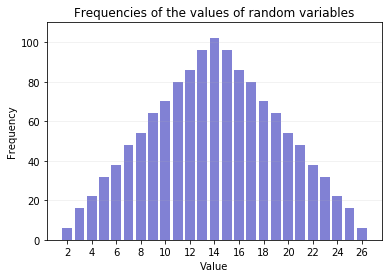

In [24]:
## plotting the frequencies

import matplotlib.pyplot as plt
%matplotlib inline
n, bins, patches = plt.hist(x=all_values, bins=range(2,28), color='#0504aa',
                            alpha=0.5, rwidth= 0.8,align = 'left' )
plt.grid(axis='y', alpha=0.2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(range(2,28,2))
plt.title('Frequencies of the values of random variables')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

plt.show()

In [25]:
# %load -r 24-25 supplement.py
import collections
counter = collections.Counter(all_values)

In [26]:
counter

Counter({9: 64,
         15: 96,
         12: 86,
         19: 64,
         18: 70,
         22: 38,
         7: 48,
         17: 80,
         11: 80,
         24: 22,
         13: 96,
         2: 6,
         8: 54,
         5: 32,
         10: 70,
         14: 102,
         3: 16,
         26: 6,
         20: 54,
         25: 16,
         21: 48,
         16: 86,
         4: 22,
         6: 38,
         23: 32})

P(X = 14) = 102/1326

P(X = 15) = 96/1326

P(12< X < 15) = (96 + 102)/ 1326

P(X<5) = (6 + 16 + 22)/1326

In [29]:
# %load -r 27-32 supplement.py
# Convert frequency to probability - divide each frequency value by total number of values
pmf = []
for key, val in counter.items():
    pmf.append(round(val / len(all_values), 4))

print(counter.keys(), pmf)

dict_keys([9, 15, 12, 19, 18, 22, 7, 17, 11, 24, 13, 2, 8, 5, 10, 14, 3, 26, 20, 25, 21, 16, 4, 6, 23]) [0.0483, 0.0724, 0.0649, 0.0483, 0.0528, 0.0287, 0.0362, 0.0603, 0.0603, 0.0166, 0.0724, 0.0045, 0.0407, 0.0241, 0.0528, 0.0769, 0.0121, 0.0045, 0.0407, 0.0121, 0.0362, 0.0649, 0.0166, 0.0287, 0.0241]


In [30]:
counter;

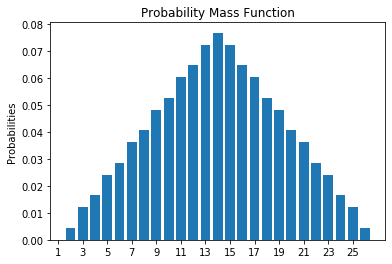

In [32]:
## we can plot the probability mass function
plt.bar(counter.keys(),pmf)

plt.xticks(range(1,27,2))
plt.ylabel('Probabilities')

plt.title("Probability Mass Function")
plt.show()

Probability mass function for discrete random variables.
f(x) = P(X =x)

### Cumulative Mass Function


The CDF is a function of $x$ just like a PMF or a PDF, where $x$ is any value that can possibly appear in a given distribution. To calculate the $CDF(x)$ for any value of $x$, we compute the proportion of values in the distribution less than or equal to $x$ as follows:

$$\large F(x) = P(X \leq x)$$

> The Cumulative Distribution Function, CDF, gives the probability that the variable $X$ is less than or equal to a certain possible value $x$. 



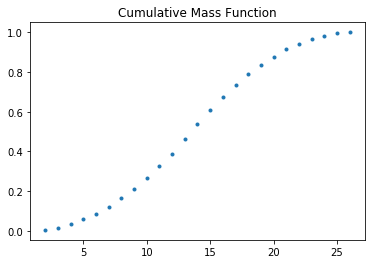

In [34]:
# %load -r 35-38 supplement.py
x = np.unique(all_values, return_counts=True)[0]
y = np.cumsum(np.unique(all_values, return_counts=True)[1])/len(all_values)
plt.plot(x,y, marker = '.',linestyle = 'none')

plt.title("Cumulative Mass Function")

plt.show()

### Further Discussions


- Please read the corresponding material form learn.co. Especially the definitions of expected values and variance.

- Note that one of the most important discrete distribution is Bernoulli and Binomial distributions. We will discuss these in more details but make sure that you read the corresponding material in learn.co.

## Probability Density Functions

- First observation: For a cont. random variable the probability of getting an exact value is always zero. (Bummer!!)

- In that sense, instead of exact probabilities we will talk about density of the random variables. 


- A Probability Density Function (PDF) helps identify the regions in the distribution where observations are more likely to occur, in other words, where the observation occurrence is more dense.


<img src="img/probability_for_continuous_rv.png" width="650">

- In this case, probability is found by the following formula: 

$$\large P(82 \leq X \leq 85) = \int_{82}^{85} f_x(x) dx \geq 0 $$

- Let's consider the example where the random variable is the exact measure of height of a randomly chosen person from Lafayatte Park.

Probability Mass function : f(x) = P(X =x) -- > Discrete Case
    
Probability Density Function: f(x)  --> Continuous Case
    

In continuous case: P(X = x) = 0

P(a<X<b) = $\int\limits_{a}^{b} f(x)dx$ --> Area under the curve between a and b

##  Normal Distribution

[Normal Distribution](https://www.mathsisfun.com/data/standard-normal-distribution.html)

[Normal Distribution App](https://homepage.divms.uiowa.edu/~mbognar/applets/normal.html)

[Standardization](https://www.intmath.com/counting-probability/normal-distribution-graph-interactive.php)

[Scipy - Normal Distributions](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

## Binomial Distribution

[Binomial Mass Function](https://homepage.divms.uiowa.edu/~mbognar/applets/bin.html)

## Other important Distributions

[Chi-Squared](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)

[Poisson](https://homepage.divms.uiowa.edu/~mbognar/applets/pois.html)

[Gamma](https://en.wikipedia.org/wiki/Gamma_distribution)

## Extra 

[Desmos - PDF and CDF](https://www.desmos.com/calculator/auhxppbg8c)

[Wiki - Distributions](https://en.wikipedia.org/wiki/Probability_distribution)